# Test Notebook to learn how to read in GPS

### Some sources of GPS data

Greenland

http://go-gnet.org/data/

https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html

____

### Load in some modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Specify directories and filenames
and other runtime options

In [2]:
def read_GPS_nam14(path, columns=None):
    columns=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN']
    df = pd.read_csv(path, skiprows=12, header=None, engine='c')
    if len(df.columns) == len(columns):
        df.columns = ['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN']
        dt = pd.to_datetime(df['Date'])
    
    # create datetime index
    df.index = pd.DatetimeIndex(dt)
    df = df.drop('Date', axis=1)
    return df

In [3]:
dir_in = 'data'
file_in = 'KULL.cwu.nam14'
ext = '.csv'

In [4]:
filepath = os.path.join(dir_in, file_in + ext)

### Basic `read_csv` to peek into the csv file

In [5]:
# df = pd.read_csv(os.path.join(dir_in, file_in))
df = read_GPS_nam14(filepath)
df

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD,Quality,NaN
Date,,,,,,,,
2007-08-15,0.00,0.00,0.00,2.17,1.63,10.35,repro,NaN
2007-08-16,-1.20,-0.40,-9.86,2.11,1.59,9.85,repro,NaN
2007-08-17,-0.38,-1.15,-5.59,2.09,1.58,9.68,repro,NaN
2007-08-18,0.99,-0.50,-0.62,2.10,1.57,9.83,repro,NaN
2007-08-19,1.65,-1.67,2.67,2.17,1.66,10.46,repro,NaN
...,...,...,...,...,...,...,...,...
2019-05-15,-25.05,-31.07,99.41,1.92,1.45,9.30,suppf,NaN
2019-05-16,-24.44,-31.24,93.71,1.95,1.46,9.34,suppf,NaN
2019-05-17,-25.36,-30.92,91.95,2.01,1.53,9.75,suppf,NaN


In [6]:
# with open(filepath) as myfile:
#     firstNlines=myfile.readlines()[0:5] #put here the interval you want
    
# print(firstNlines)

#with open(filepath) as myfile:
   # head = [next(myfile) for x in range(13)]
#print(head)

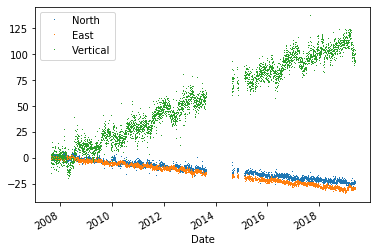

In [7]:
df[['North', 'East', 'Vertical']].plot(linestyle='', marker=',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002312770C808>],
      dtype=object)

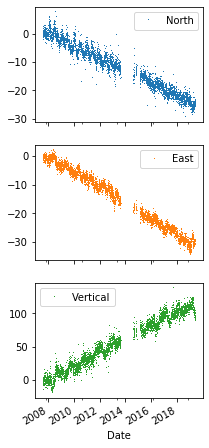

In [8]:
df[['North', 'East', 'Vertical']].plot(subplots=True, 
                                       layout=(3, 1), figsize=(3, 8), 
                                       linestyle='', marker=',',
                                       sharex=True)

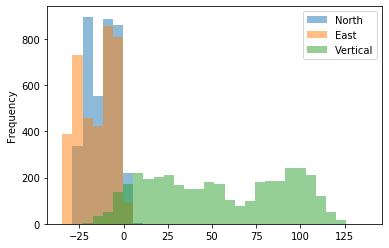

In [9]:
df[['North', 'East', 'Vertical']].plot.hist(alpha=0.5, bins=30)

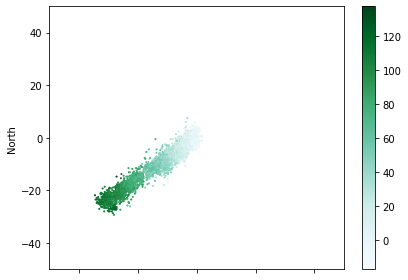

In [10]:
df.plot.hexbin(x='East', y='North', C='Vertical')
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.tight_layout()

In [11]:
df.index[-1] - df.index[0]

Timedelta('4295 days 00:00:00')

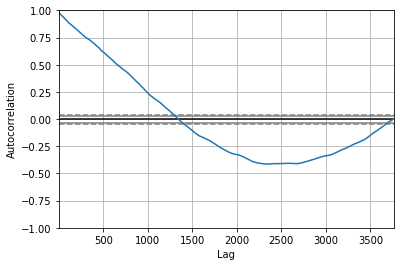

In [12]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df[['Vertical']])

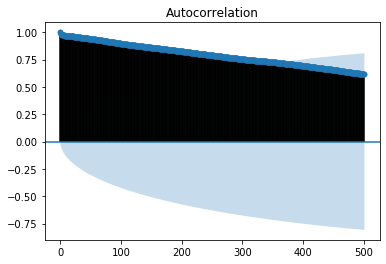

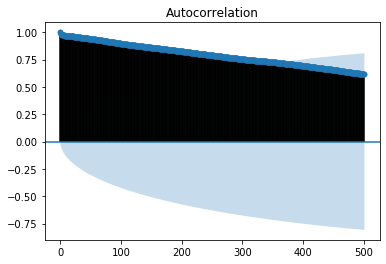

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df[['Vertical']], lags = 500)

In [14]:
df[['North', 'East', 'Vertical']].corr()

,North,East,Vertical
North,1.000000,0.965090,-0.949176
East,0.965090,1.000000,-0.976086
Vertical,-0.949176,-0.976086,1.000000
